In [1]:
#Experiment 1

# Import necessary library
import numpy as np

# Define the single artificial neuron
def single_neuron(inputs, weights, bias):
    # Compute the weighted sum
    weighted_sum = np.dot(inputs, weights) + bias
    # Apply the step activation function
    output = 1 if weighted_sum >= 0 else 0
    return output

# Inputs (X) and weights (W)
inputs = np.array([1, -1])  # Example input
weights = np.array([0.5, 0.5])  # Example weights
bias = -0.2  # Example bias

# Output from the neuron
output = single_neuron(inputs, weights, bias)

print(f"Inputs: {inputs}")
print(f"Weights: {weights}")
print(f"Bias: {bias}")
print(f"Neuron Output: {output}")


Inputs: [ 1 -1]
Weights: [0.5 0.5]
Bias: -0.2
Neuron Output: 0


In [6]:
#Experiment 2

import numpy as np

# Step Activation Function
def step_function(x):
    return 1 if x >= 0 else 0

# Single Layer Perceptron Model
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return step_function(weighted_sum)

    def train(self, X, y):
        for epoch in range(self.epochs):
            print(f"Epoch {epoch + 1}")
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                error = target - prediction
                # Update weights and bias
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
                print(f"Inputs: {inputs}, Target: {target}, Prediction: {prediction}, Weights: {self.weights}, Bias: {self.bias}")
            print()

# Linearly separable dataset (AND Gate)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])  # Outputs (AND Gate)

# Initialize and train the perceptron
perceptron = SingleLayerPerceptron(input_size=2, learning_rate=0.1, epochs=10)
perceptron.train(X, y)

# Test the perceptron
print("Testing the trained model:")
for inputs in X:
    prediction = perceptron.predict(inputs)
    print(f"Inputs: {inputs}, Prediction: {prediction}")


Epoch 1
Inputs: [0 0], Target: 0, Prediction: 1, Weights: [0. 0.], Bias: -0.1
Inputs: [0 1], Target: 0, Prediction: 0, Weights: [0. 0.], Bias: -0.1
Inputs: [1 0], Target: 0, Prediction: 0, Weights: [0. 0.], Bias: -0.1
Inputs: [1 1], Target: 1, Prediction: 0, Weights: [0.1 0.1], Bias: 0.0

Epoch 2
Inputs: [0 0], Target: 0, Prediction: 1, Weights: [0.1 0.1], Bias: -0.1
Inputs: [0 1], Target: 0, Prediction: 1, Weights: [0.1 0. ], Bias: -0.2
Inputs: [1 0], Target: 0, Prediction: 0, Weights: [0.1 0. ], Bias: -0.2
Inputs: [1 1], Target: 1, Prediction: 0, Weights: [0.2 0.1], Bias: -0.1

Epoch 3
Inputs: [0 0], Target: 0, Prediction: 0, Weights: [0.2 0.1], Bias: -0.1
Inputs: [0 1], Target: 0, Prediction: 1, Weights: [0.2 0. ], Bias: -0.2
Inputs: [1 0], Target: 0, Prediction: 1, Weights: [0.1 0. ], Bias: -0.30000000000000004
Inputs: [1 1], Target: 1, Prediction: 0, Weights: [0.2 0.1], Bias: -0.20000000000000004

Epoch 4
Inputs: [0 0], Target: 0, Prediction: 0, Weights: [0.2 0.1], Bias: -0.200000

In [9]:
#Experiment 3

import numpy as np

# Sigmoid Activation Function and its Derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Multi-Layer Perceptron Class
class MultiLayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.bias_hidden = np.random.uniform(-1, 1, hidden_size)
        self.weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_output = np.random.uniform(-1, 1, output_size)
        self.learning_rate = learning_rate

    def forward_propagation(self, inputs):
        # Hidden layer computations
        self.hidden_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        # Output layer computations
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)
        return self.final_output

    def back_propagation(self, inputs, target):
        # Calculate output error
        output_error = target - self.final_output
        output_delta = output_error * sigmoid_derivative(self.final_output)

        # Calculate hidden layer error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * self.learning_rate
        self.weights_input_hidden += np.dot(inputs.T, hidden_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0) * self.learning_rate

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            for inputs, target in zip(X, y):
                inputs = inputs.reshape(1, -1)
                target = target.reshape(1, -1)
                # Forward and backward propagation
                self.forward_propagation(inputs)
                self.back_propagation(inputs, target)

    def predict(self, inputs):
        return self.forward_propagation(inputs)

# XOR Gate Dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([[0], [1], [1], [0]])  # XOR Outputs

# Initialize and train the MLP
mlp = MultiLayerPerceptron(input_size=2, hidden_size=2, output_size=1, learning_rate=0.1)
mlp.train(X, y, epochs=10000)

# Test the trained MLP
print("Testing the trained MLP on XOR gate:")
for inputs, target in zip(X, y):
    inputs = inputs.reshape(1, -1)  # Ensure inputs are 2D
    prediction = mlp.predict(inputs)
    print(f"Inputs: {inputs.flatten()}, Target: {target}, Prediction: {prediction[0][0]:.4f}")


Testing the trained MLP on XOR gate:
Inputs: [0 0], Target: [0], Prediction: 0.0456
Inputs: [0 1], Target: [1], Prediction: 0.9375
Inputs: [1 0], Target: [1], Prediction: 0.4947
Inputs: [1 1], Target: [0], Prediction: 0.5020


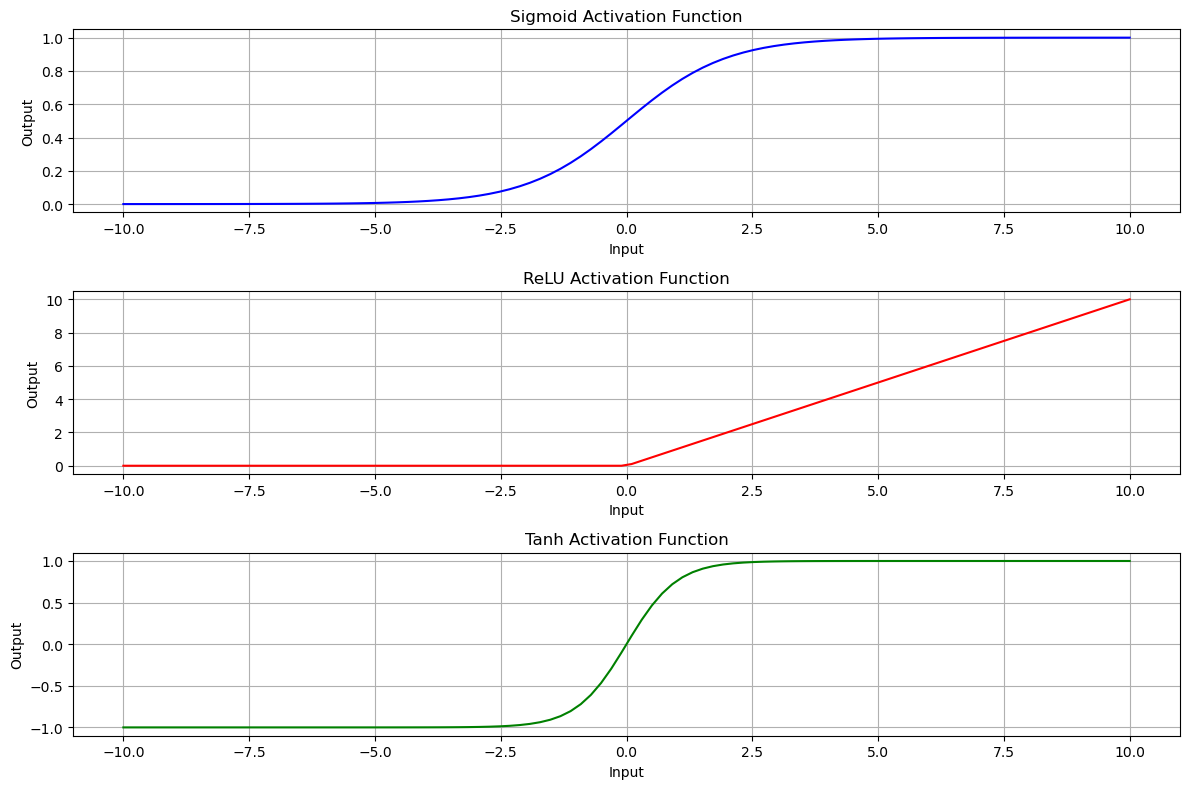

In [10]:
#Experiment 4

import numpy as np
import matplotlib.pyplot as plt

# Define Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Generate a sample dataset (range of values)
x = np.linspace(-10, 10, 100)

# Compute outputs for each activation function
sigmoid_output = sigmoid(x)
relu_output = relu(x)
tanh_output = tanh(x)

# Plot the results
plt.figure(figsize=(12, 8))

# Sigmoid
plt.subplot(3, 1, 1)
plt.plot(x, sigmoid_output, label="Sigmoid", color="blue")
plt.title("Sigmoid Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

# ReLU
plt.subplot(3, 1, 2)
plt.plot(x, relu_output, label="ReLU", color="red")
plt.title("ReLU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

# Tanh
plt.subplot(3, 1, 3)
plt.plot(x, tanh_output, label="Tanh", color="green")
plt.title("Tanh Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

plt.tight_layout()
plt.show()



In [12]:
#Experiment 5

import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the neural network class
class TwoLayerNN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Initialize weights and biases randomly
        self.weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.bias_hidden = np.random.uniform(-1, 1, hidden_size)
        self.weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_output = np.random.uniform(-1, 1, output_size)
        self.learning_rate = learning_rate

    def forward_propagation(self, X):
        # Hidden layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)

        # Output layer
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)
        return self.final_output

    def back_propagation(self, X, y):
        # Calculate output error and delta
        output_error = y - self.final_output
        output_delta = output_error * sigmoid_derivative(self.final_output)

        # Calculate hidden layer error and delta
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_de

